In [3]:
import matplotlib.pyplot as plt
import jax.numpy as jnp
from drt_solver.utils import gamma_ZARC, ZARC
from drt_solver.drt import DRT
from drt_solver.simulation import Simulation

%load_ext autoreload
%autoreload 2

In [4]:
tau_integ = jnp.logspace(-8, 8, 100)
f = jnp.logspace(-6, 6, 50)
R_ct = 50.0 
tau_0 = .01
phi = 0.8
R_inf = 10.0 
L = 0 

gamma1 = gamma_ZARC(tau=tau_integ , R_ct= R_ct, tau_0= tau_0, phi = phi)
gamma2 = gamma_ZARC(tau=tau_integ , R_ct= R_ct, tau_0= 0.3, phi = phi)
gamma = gamma2 + gamma1


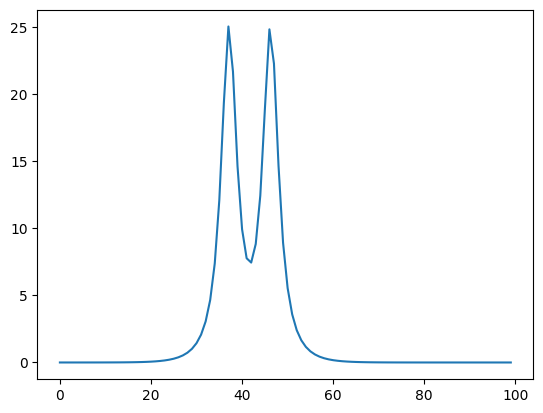

In [5]:
plt.plot(gamma)
plt.show()

In [6]:
zarc =  ZARC(f, R_inf, R_ct= R_ct, tau_0= tau_0, phi = phi)
zarc

Array([59.99997324-8.23606489e-05j, 59.99995798-1.29311712e-04j,
       59.99993403-2.03027942e-04j, 59.99989642-3.18767126e-04j,
       59.99983738-5.00484773e-04j, 59.99974467-7.85792041e-04j,
       59.9995991 -1.23373949e-03j, 59.99937054-1.93703676e-03j,
       59.99901164-3.04123511e-03j, 59.99844806-4.77483726e-03j,
       59.99756298-7.49655223e-03j, 59.99617281-1.17694401e-02j,
       59.99398884-1.84772043e-02j, 59.99055661-2.90064835e-02j,
       59.98515978-4.55323314e-02j, 59.9766667 -7.14646362e-02j,
       59.96328353-1.12144564e-01j, 59.94215194-1.75926942e-01j,
       59.90868155-2.75852097e-01j, 59.85541508-4.32201735e-01j,
       59.7700382 -6.76337867e-01j, 59.63176467-1.05628723e+00j,
       59.40454229-1.64436758e+00j, 59.02398143-2.54618384e+00j,
       58.37227939-3.90695197e+00j, 57.2328469 -5.90139794e+00j,
       55.22271002-8.67060771e+00j, 51.74895124-1.21367124e+01j,
       46.17746113-1.56687576e+01j, 38.48497484-1.79315265e+01j,
       29.97171715-1.7678

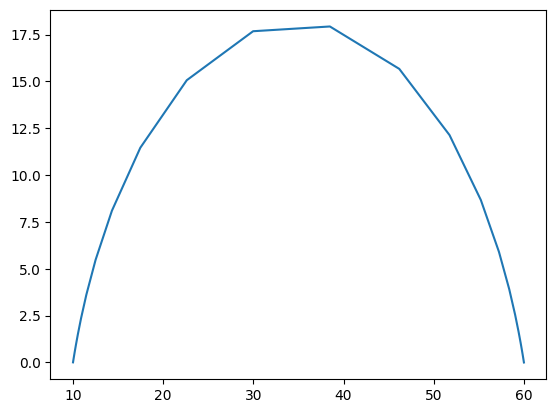

In [7]:
plt.plot(zarc.real, -zarc.imag)

# Using the RBF functions can we get the same

In [9]:
drt_object = DRT(R_inf=R_inf, L_0=L, x=gamma, tau=tau_integ)

In [10]:
x = Simulation(drt_object, f_vec=f)

In [11]:
re, im = x.run()

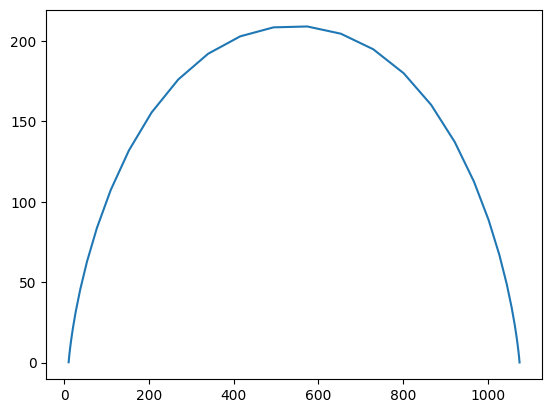

In [12]:
plt.plot(re, -im)

In [13]:
def gaussian(y: float, mu: float) -> float:
    return jnp.exp(-( jnp.abs(y) ** 2)/mu)

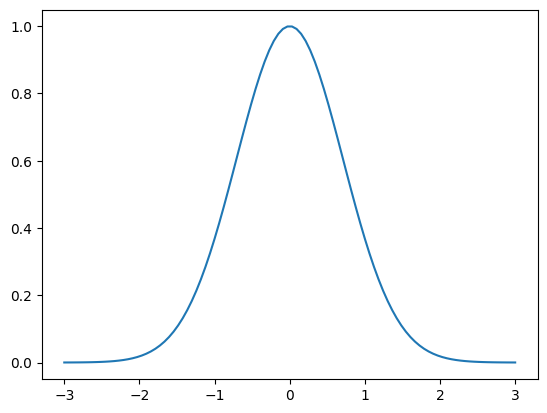

In [14]:
plt.plot(jnp.linspace(-3, 3, 100), gaussian(jnp.linspace(-3, 3, 100), 1.0))

In [12]:
x.A_matrices.shape

AttributeError: 'Simulation' object has no attribute 'A_matrices'